In [1]:
import cv2
import face_alignment
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

## 导入pretrained FA model

In [2]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False,device='cpu')

## 读取待处理图片,提取keypoint

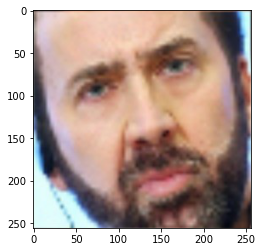

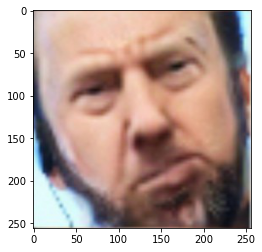

In [3]:
faceA = io.imread('C:/Users/houchen/faceswap_GAN/faceswap_GAN/faceA/1.jpg')
faceB = io.imread('C:/Users/houchen/faceswap_GAN/faceswap_GAN/faceB/2.jpg')
landmarks_A = fa.get_landmarks(faceA)
landmarks_B = fa.get_landmarks(faceB)
plt.imshow(faceA)
plt.show()
plt.imshow(faceB)
plt.show()

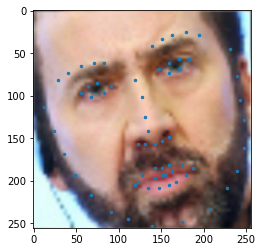

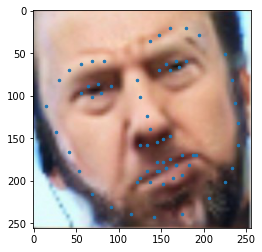

In [4]:
plt.imshow(faceA)
plt.plot(landmarks_A[0][:,0],landmarks_A[0][:,1],'.',markersize=5)
plt.show()

plt.imshow(faceB)
plt.plot(landmarks_B[0][:,0],landmarks_B[0][:,1],'.',markersize=5)
plt.show()

## 生成mask

In [5]:
maskA = np.zeros_like(faceA)
hullA = cv2.convexHull(np.array(landmarks_A)).astype(np.int32)
maskA = cv2.drawContours(maskA,[hullA],0,(1,1,1),-1)

maskB = np.zeros_like(faceB)
hullB = cv2.convexHull(np.array(landmarks_B)).astype(np.int32)
maskB = cv2.drawContours(maskB,[hullB],0,(1,1,1),-1)

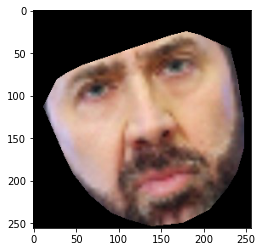

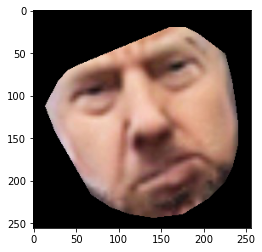

In [6]:
plt.imshow(maskA*faceA)
plt.show()
plt.imshow(maskB*faceB)
plt.show()

## RANSAC法求解Homography matrix

In [7]:
homography, mask = cv2.findHomography(landmarks_A[0], landmarks_B[0], cv2.RANSAC, ransacReprojThreshold=2.0)
matchesMask = mask.ravel().tolist()
h,w,_ = faceA.shape

In [8]:
im_in = maskA*faceA
im_out = cv2.warpPerspective(im_in, homography, (faceB.shape[1],faceB.shape[0]))
mask_out = 255 * cv2.warpPerspective(maskA, homography, (faceB.shape[1],faceB.shape[0]))

## 边界处理

In [9]:
result = cv2.seamlessClone(im_out, faceB, mask_out, (h//2,w//2), cv2.NORMAL_CLONE)

ground truth: 


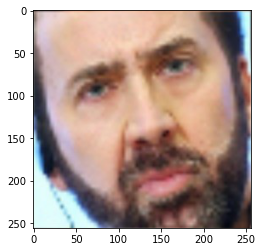

result: 


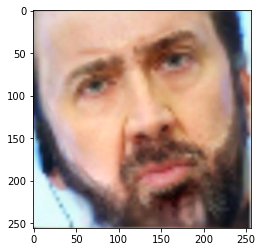

In [10]:
print('ground truth: ')
plt.imshow(faceA)
plt.show()

print('result: ')
plt.imshow(result)
plt.show()